In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
dt=pd.read_csv("forestfires.csv")
dt

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
dt.shape

(517, 31)

In [4]:
dt.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
duplicate=dt[dt.duplicated()]
print("Duplicate Row:")

Duplicate Row:


In [6]:
dt.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [7]:
dt=dt.loc[:,['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind','rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu','daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb','monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov','monthoct', 'monthsep', 'size_category']]
dt

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [8]:
x=dt.iloc[:,0:-1]
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
y=dt.iloc[:,-1]
y

0      small
1      small
2      small
3      small
4      small
       ...  
512    large
513    large
514    large
515    small
516    small
Name: size_category, Length: 517, dtype: object

In [10]:
y.replace(to_replace=['small','large'],value=[0,1],inplace=True)

In [11]:
y

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: size_category, Length: 517, dtype: int64

In [12]:
y=y
y

0      0
1      0
2      0
3      0
4      0
      ..
512    1
513    1
514    1
515    0
516    0
Name: size_category, Length: 517, dtype: int64

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

# Build the Model

In [14]:
import tensorflow as tf

In [15]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_dim=28,activation ='sigmoid'))
model.add(tf.keras.layers.Dense(10,activation='sigmoid'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                435       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 606
Trainable params: 606
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
history=model.fit(x,y,validation_split=0.20,epochs=50,batch_size=100)

Epoch 1/50
1/5 [=====>........................] - ETA: 0s - loss: 0.9597 - accuracy: 0.2400

2023-06-05 21:58:45.833691: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


5/5 [==============================] - 0s 32ms/step - loss: 0.9251 - accuracy: 0.2615 - val_loss: 0.8879 - val_accuracy: 0.2981
Epoch 2/50
5/5 [==============================] - 0s 3ms/step - loss: 0.8775 - accuracy: 0.2615 - val_loss: 0.8387 - val_accuracy: 0.2981
Epoch 3/50
5/5 [==============================] - 0s 3ms/step - loss: 0.8303 - accuracy: 0.2615 - val_loss: 0.7901 - val_accuracy: 0.2981
Epoch 4/50
5/5 [==============================] - 0s 3ms/step - loss: 0.7866 - accuracy: 0.2615 - val_loss: 0.7555 - val_accuracy: 0.2981
Epoch 5/50
5/5 [==============================] - 0s 3ms/step - loss: 0.7540 - accuracy: 0.2615 - val_loss: 0.7369 - val_accuracy: 0.2981
Epoch 6/50
5/5 [==============================] - 0s 3ms/step - loss: 0.7327 - accuracy: 0.2615 - val_loss: 0.7219 - val_accuracy: 0.2981
Epoch 7/50
5/5 [==============================] - 0s 3ms/step - loss: 0.7147 - accuracy: 0.2615 - val_loss: 0.7071 - val_accuracy: 0.3077
Epoch 8/50
5/5 [============================

In [19]:
model.save_weights('mywt.kmw')

In [20]:
scores=model.evaluate(x,y)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 440us/step - loss: 0.5281 - accuracy: 0.7485
accuracy: 74.85%


In [21]:
model.history.history.keys()
import matplotlib.pyplot as plt

In [22]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

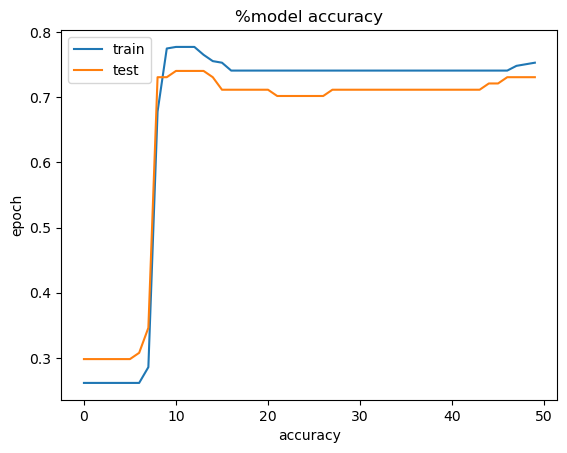

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('%model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

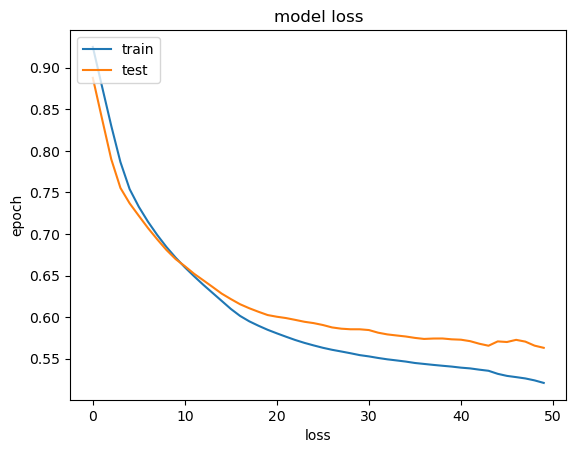

In [24]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [25]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(15,input_dim=28,activation='ReLU'))
model.add(tf.keras.layers.Dense(10,activation='ReLU'))
model.add(tf.keras.layers.Dense(1,activation='ReLU'))

In [26]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
history=model.fit(x,y,validation_split=0.20, epochs=50,batch_size=100)

Epoch 1/50
5/5 [==============================] - 0s 15ms/step - loss: 9.9404 - accuracy: 0.3487 - val_loss: 10.2757 - val_accuracy: 0.3269
Epoch 2/50
5/5 [==============================] - 0s 3ms/step - loss: 9.9404 - accuracy: 0.3487 - val_loss: 10.2757 - val_accuracy: 0.3269
Epoch 3/50
5/5 [==============================] - 0s 3ms/step - loss: 9.9404 - accuracy: 0.3487 - val_loss: 10.2757 - val_accuracy: 0.3269
Epoch 4/50
5/5 [==============================] - 0s 3ms/step - loss: 9.9404 - accuracy: 0.3487 - val_loss: 10.2757 - val_accuracy: 0.3269
Epoch 5/50
5/5 [==============================] - 0s 4ms/step - loss: 9.9404 - accuracy: 0.3487 - val_loss: 10.2757 - val_accuracy: 0.3269
Epoch 6/50
5/5 [==============================] - 0s 4ms/step - loss: 9.9404 - accuracy: 0.3487 - val_loss: 10.2757 - val_accuracy: 0.3269
Epoch 7/50
5/5 [==============================] - 0s 4ms/step - loss: 9.9404 - accuracy: 0.3487 - val_loss: 10.2757 - val_accuracy: 0.3269
Epoch 8/50
5/5 [==========

In [28]:
history=model.fit(x,y,validation_split=0.20, epochs=50,batch_size=100)

Epoch 1/50
5/5 [==============================] - 0s 8ms/step - loss: 9.9404 - accuracy: 0.3487 - val_loss: 10.2757 - val_accuracy: 0.3269
Epoch 2/50
5/5 [==============================] - 0s 3ms/step - loss: 9.9404 - accuracy: 0.3487 - val_loss: 10.2757 - val_accuracy: 0.3269
Epoch 3/50
5/5 [==============================] - 0s 3ms/step - loss: 9.9404 - accuracy: 0.3487 - val_loss: 10.2757 - val_accuracy: 0.3269
Epoch 4/50
5/5 [==============================] - 0s 3ms/step - loss: 9.9404 - accuracy: 0.3487 - val_loss: 10.2757 - val_accuracy: 0.3269
Epoch 5/50
5/5 [==============================] - 0s 3ms/step - loss: 9.9404 - accuracy: 0.3487 - val_loss: 10.2757 - val_accuracy: 0.3269
Epoch 6/50
5/5 [==============================] - 0s 3ms/step - loss: 9.9404 - accuracy: 0.3487 - val_loss: 10.2757 - val_accuracy: 0.3269
Epoch 7/50
5/5 [==============================] - 0s 3ms/step - loss: 9.9404 - accuracy: 0.3487 - val_loss: 10.2757 - val_accuracy: 0.3269
Epoch 8/50
5/5 [===========

In [29]:
scores=model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1],scores[1]*100))

17/17 [==============================] - 0s 405us/step - loss: 10.0079 - accuracy: 0.3443
accuracy: 34.43%


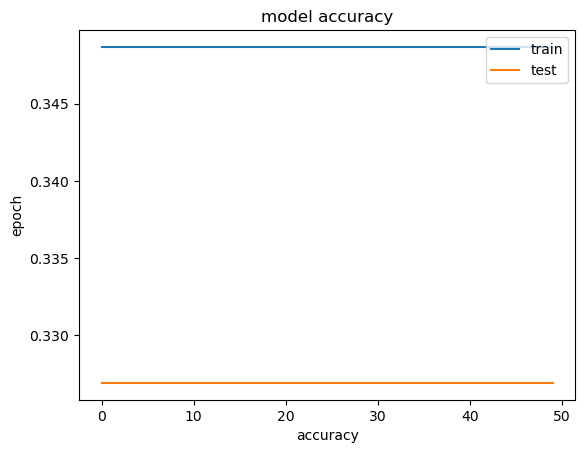

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.show()

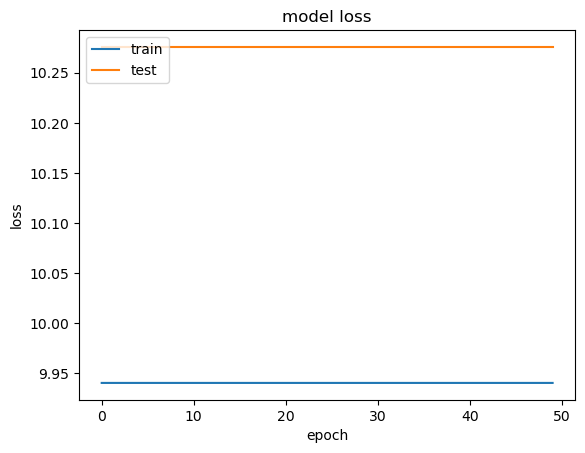

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()